In [1]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Concatenate all files into a single dataframe

pd.set_option('display.max_columns',200)
path = '/Users/jack.galvin/Desktop/AirBnB Analysis'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

working_frame = pd.concat(li, axis=0, ignore_index=True)

/Users/jack.galvin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (43,88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/jack.galvin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (43,61,62,88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/jack.galvin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (43,61,62,77,78,88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/jack.galvin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import 

In [4]:
working_frame.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,bathrooms_text,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,18461891,https://www.airbnb.com/rooms/18461891,20171002002103,2017-10-03,"Bright, comfortable 1B studio near everything!",*Looking to fill these specific dates: June 24...,Very well illuminated space includes comfortab...,*Looking to fill these specific dates: June 24...,none,There are Michelin-rated restaurants in the ar...,NaN,"Astoria is a safe and quaint neighborhood, and...",IMPORTANT: This space is not suitable for chil...,Arrangements will be made in advance regarding...,NaN,https://a0.muscache.com/im/pictures/8ac331a9-3...,https://a0.muscache.com/im/pictures/8ac331a9-3...,https://a0.muscache.com/im/pictures/8ac331a9-3...,https://a0.muscache.com/im/pictures/8ac331a9-3...,916092,https://www.airbnb.com/users/show/916092,Connie Mae,2011-08-03,"New York, New York, United States",sensation(URL HIDDEN),NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/2bdfa9ca-a...,https://a0.muscache.com/im/pictures/2bdfa9ca-a...,Astoria,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Queens, NY, United States",Astoria,Ditmars Steinway,Queens,Queens,NY,11105,New York,"Queens, NY",US,United States,40.774142,-73.916246,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",NaN,$110.00,NaN,NaN,$250.00,$85.00,1.0,$0.00,6,6,5 months ago,t,0,0,0,0,2017-10-03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict,f,f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20702398,https://www.airbnb.com/rooms/20702398,20171002002103,2017-10-03,Quiet house on City Island,1 private bedroom and bathroom available for o...,NaN,1 private bedroom and bathroom available for o...,none,This neighborhood is dope! Lot's of seafood re...,No loud parties or hard drugs There is wifi bu...,walk! The island is only 1.5 miles long. Publi...,"kitchen, laundry, living room, back yard",My schedule varies week-to-week. I usually wor...,No third-party bookings,https://a0.muscache.com/im/pictures/7c0a47b7-5...,https://a0.muscache.com/im/pictures/7c0a47b7-5...,https://a0.muscache.com/im/pictures/7c0a47b7-5...,https://a0.muscache.com/im/pictures/7c0a47b7-5...,1457680,https://www.airbnb.com/users/show/1457680,James,2011-11-30,"Bronx, New York, United States",Hi

In [3]:
# Recast prices as float and drop irrelevant columns

working_frame['price'] = working_frame['price'].replace('[\$,]', '', regex=True).astype(float)
working_frame['cleaning_fee'] = working_frame['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
columns_to_drop = ['listing_url', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'country_code', 'country', 'is_location_exact', 'amenities', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month', 'bathrooms_text', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'latitude', 'longitude', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'city', 'state', 'zipcode', 'market', 'smart_location', 'weekly_price', 'monthly_price', 'security_deposit', 'guests_included', 'extra_people', 'calendar_last_scraped']
working_frame.drop(columns_to_drop, axis=1, inplace=True)
working_frame.describe()

,id,scrape_id,accommodates,bathrooms,bedrooms,beds,square_feet,price,cleaning_fee,review_scores_cleanliness
count,2.337043e+06,2.337043e+06,2.337043e+06,2.049481e+06,2.306157e+06,2.328126e+06,20479.000000,2.337043e+06,1.539932e+06,1.780659e+06
mean,1.706298e+07,2.018682e+13,2.831657e+00,1.139715e+00,1.184582e+00,1.547380e+00,710.563016,1.510608e+02,6.425475e+01,9.254341e+00
std,1.138090e+07,1.158734e+10,1.862717e+00,4.263445e-01,7.360525e-01,1.096027e+00,612.628671,2.875130e+02,5.472274e+01,1.096064e+00
min,2.060000e+03,2.017010e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000e+00
25%,7.883146e+06,2.018020e+13,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,300.000000,6.800000e+01,2.500000e+01,9.000000e+00
50%,1.588227e+07,2.019020e+13,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,700.000000,1.000000e+02,5.000000e+01,1.000000e+01
75%,2.374916e+07,2.020021e+13,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,925.000000,1.750000e+02,9.000000e+01,1.000000e+01
max,4.803978e+07,2.021020e+13,2.600000e+01,4.800000e+01,2.200000e+01,4.200000e+01,10118.000000,9.759800e+04,1.200000e+03,1.000000e+01


In [4]:
# Check for null values

working_frame.isna().sum()

id                                    0
scrape_id                             0
last_scraped                          0
neighbourhood_group_cleansed          0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                        287562
bedrooms                          30886
beds                               8917
bed_type                         292561
square_feet                     2316564
price                                 0
cleaning_fee                     797111
review_scores_cleanliness        556384
dtype: int64

In [5]:
# Fill NaN with median

working_frame.fillna(working_frame.median(), inplace=True)

In [6]:
# Identify and remove outliers

z = np.abs(stats.zscore(working_frame[['price', 'bedrooms', 'bathrooms']]))
working_frame = working_frame[(z < 3).all(axis=1)]

In [9]:
working_frame.describe()

,id,scrape_id,accommodates,bathrooms,bedrooms,beds,square_feet,price,cleaning_fee,review_scores_cleanliness
count,2.266260e+06,2.266260e+06,2.266260e+06,2.266260e+06,2.266260e+06,2.266260e+06,2.266260e+06,2.266260e+06,2.266260e+06,2.266260e+06
mean,1.701483e+07,2.018682e+13,2.708347e+00,1.082004e+00,1.122745e+00,1.470562e+00,6.997549e+02,1.334403e+02,5.766570e+01,9.430731e+00
std,1.135177e+07,1.160133e+10,1.593837e+00,2.652349e-01,5.891991e-01,8.955005e-01,5.051330e+01,1.049511e+02,4.093507e+01,1.008042e+00
min,2.060000e+03,2.017010e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,7.870442e+06,2.018020e+13,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+02,6.700000e+01,4.000000e+01,9.000000e+00
50%,1.584478e+07,2.019020e+13,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+02,1.000000e+02,5.000000e+01,1.000000e+01
75%,2.365269e+07,2.020021e+13,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.000000e+02,1.650000e+02,6.500000e+01,1.000000e+01
max,4.803978e+07,2.021020e+13,1.600000e+01,2.000000e+00,3.000000e+00,2.200000e+01,1.011800e+04,1.011000e+03,7.000000e+02,1.000000e+01


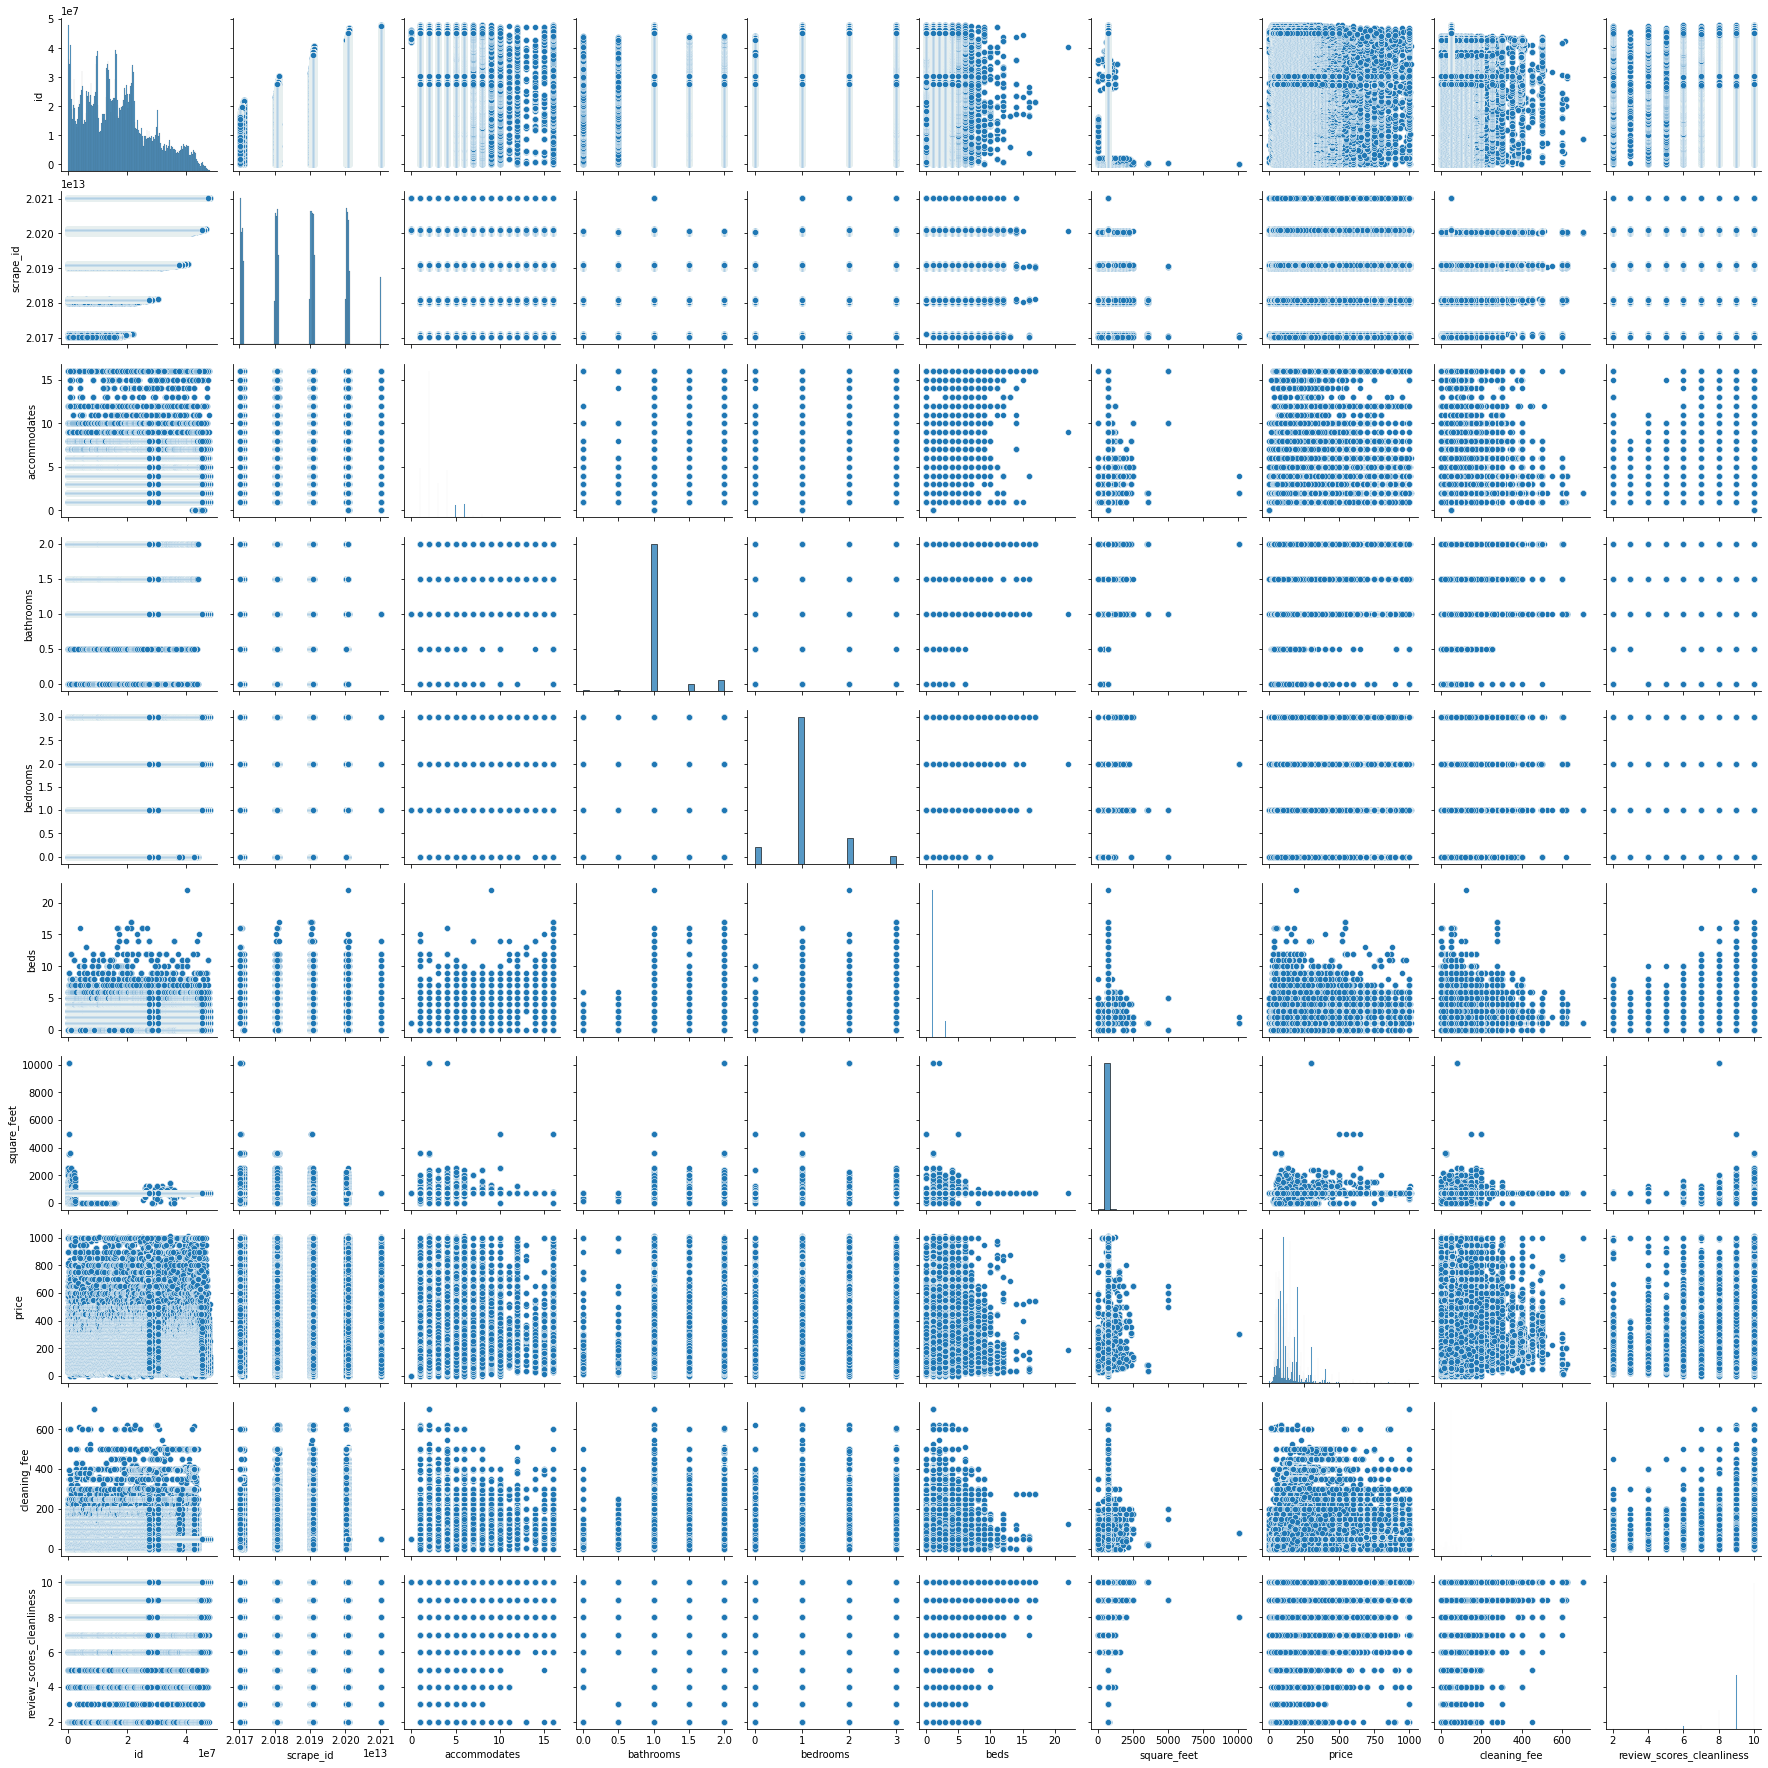

In [39]:
# Pairplot to identify potential relationships

sns.pairplot(working_frame)

<AxesSubplot:>

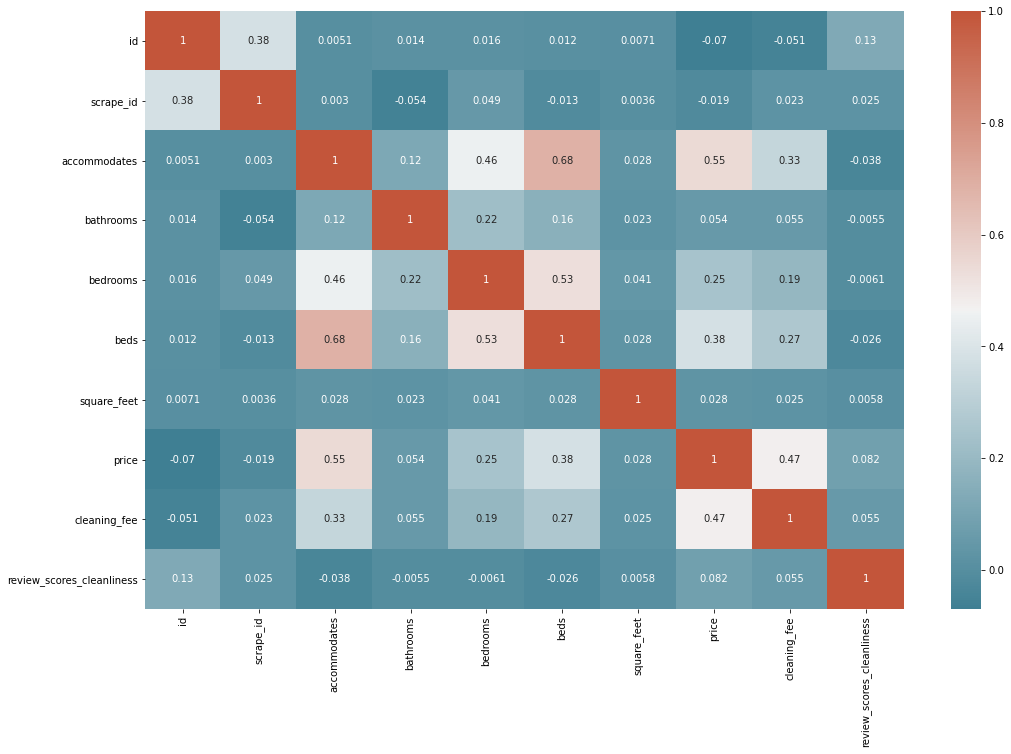

In [40]:
# Heatmap to quantify bivariate relationships

correlation = working_frame.corr('spearman')
fig, ax = plt.subplots(figsize=(17,11))
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot=True, cmap = sns.diverging_palette(220,20, as_cmap=True), ax=ax)

/Users/jack.galvin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Price')

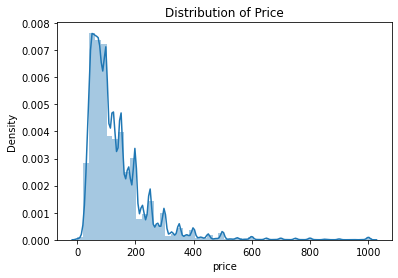

In [44]:
# Check distribution of Price

sns.distplot(working_frame['price']);
plt.title('Distribution of Price')

In [7]:
# Group listings by (month, year)

working_frame['year'] = pd.DatetimeIndex(working_frame['last_scraped']).year
working_frame['month'] = pd.DatetimeIndex(working_frame['last_scraped']).month
working_frame['month_year'] = pd.to_datetime(working_frame['last_scraped']).dt.to_period('M')
working_frame.groupby('month_year').count()

,id,scrape_id,last_scraped,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,cleaning_fee,review_scores_cleanliness,year,month
month_year,,,,,,,,,,,,,,,,,
2017-01,39843,39843,39843,39843,39843,39843,39843,39843,39843,39843,39843,39843,39843,39843,39843,39843,39843
2017-02,39392,39392,39392,39392,39392,39392,39392,39392,39392,39392,39392,39392,39392,39392,39392,39392,39392
2017-03,39490,39490,39490,39490,39490,39490,39490,39490,39490,39490,39490,39490,39490,39490,39490,39490,39490
2017-04,39538,39538,39538,39538,39538,39538,39538,39538,39538,39538,39538,39538,39538,39538,39538,39538,39538
2017-05,39624,39624,39624,39624,39624,39624,39624,39624,39624,39624,39624,39624,39624,39624,39624,39624,39624
2017-06,40030,40030,40030,40030,40030,40030,40030,40030,40030,40030,40030,40030,40030,40030,40030,40030,40030
2017-07,41657,41657,41657,41657,41657,41657,41657,41657,41657,41657,41657,41657,41657,41657,41657,41657,41657
2017-08,43538,43538,43538,43538,43538,43538,43538,43538,43538,43538,43538,43538,43538,43538,43538,43538,43538
2017-09,39958,39958,39958,39958,39958,39958,39958,39958,39958,39958,39958,39958,39958,39958,39958,39958,39958


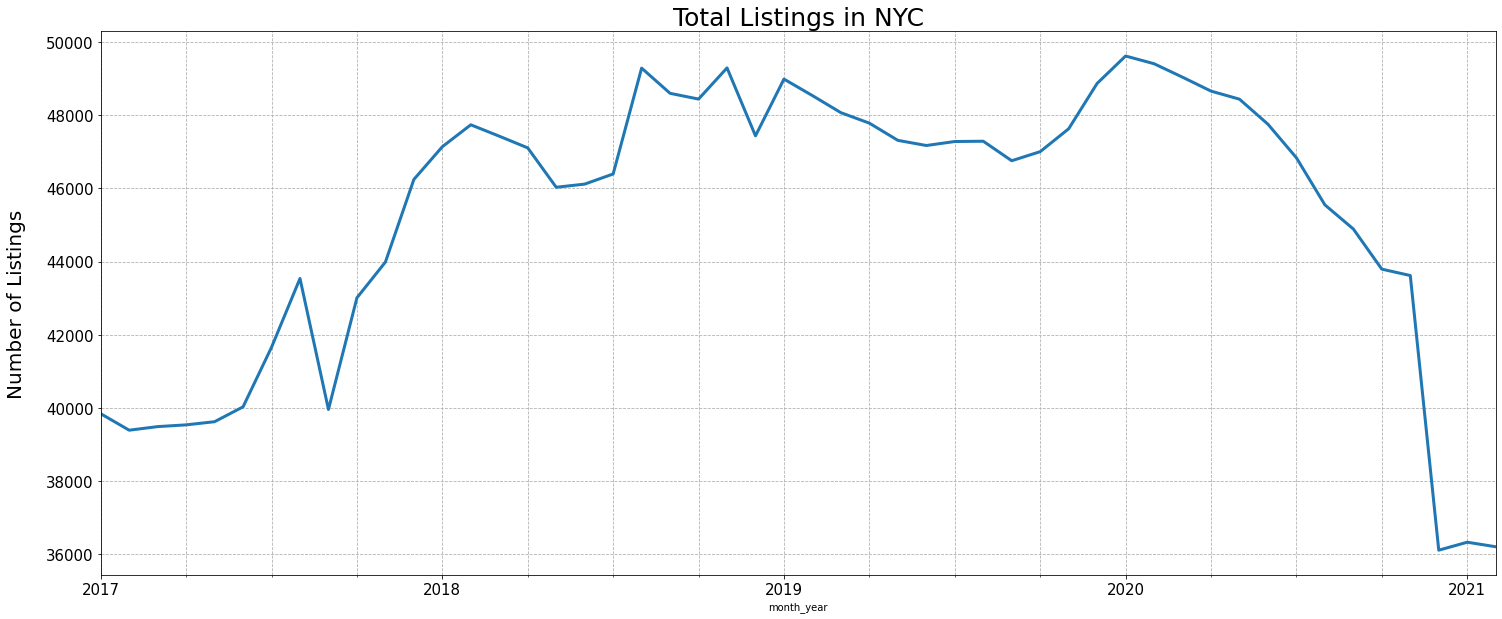

In [19]:
# Plot a chart that shows total number of listings by month, year

plt.figure(figsize=(25,10))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

plt.ylabel('Number of Listings', size = 15, labelpad = 20, fontsize = 20)
grouped_frame = working_frame.groupby('month_year').count()
grouped_frame['id'].plot(linewidth = 3);
plt.grid(which='both',linestyle='--')
plt.title('Total Listings in NYC', size = 25);

In [8]:
# Group by month_year and borough

working_frame.groupby(['month_year', 'neighbourhood_group_cleansed']).count()

id  scrape_id  last_scraped  \
month_year neighbourhood_group_cleansed                                   
2017-01    Bronx                           628        628           628   
           Brooklyn                      16202      16202         16202   
           Manhattan                     19216      19216         19216   
           Queens                         3579       3579          3579   
           Staten Island                   218        218           218   
...                                        ...        ...           ...   
2021-02    Bronx                           968        968           968   
           Brooklyn                      14134      14134         14134   
           Manhattan                     16229      16229         16229   
           Queens                         4601       4601          4601   
           Staten Island                   275        275           275   

                                         property_type  room_type  \
month_year neighbourhood_group_cleansed                             
2017-01    Bronx                                   628        628   
           Brooklyn                              16202      16202   
           Manhattan                             19216      19216   
           Queens                                 3579       3579   
           Staten Island                           218        218   
...                                                ...        ...   
2021-02    Bronx                                   968        968   
           Brooklyn                              14134      14134   
           Manhattan                             16229      16229   
           Queens                                 4601       4601   
           Staten Island                           275        275   

                                         accommodates  bathrooms  bedrooms  \
month_year neighbourhood_group_cleansed                                      
2017-01    Bronx                                  628        628       628   
           Brooklyn                             16202      16202     16202   
           Manhattan                            19216      19216     19216   
           Queens                                3579       3579      3579   
           Staten Island                          218        218       218   
...                                               ...        ...       ...   
2021-02    Bronx                                  968        968       968   
           Brooklyn                             14134      14134     14134   
           Manhattan                            16229      16229     16229   
           Queens                                4601       4601      4601   
           Staten Island                          275        275       275   

                                          beds  bed_type  square_feet  price  \
month_year neighbourhood_group_cleansed                                        
2017-01    Bronx                           628       628          628    628   
           Brooklyn                      16202     16202        16202  16202   
           Manhattan                     19216     19216        19216  19216   
           Queens                         3579      3579         3579   3579   
           Staten Island                   218       218          218    218   
...                                        ...       ...          ...    ...   
2021-02    Bronx                           968         0          968    968   
           Brooklyn                      14134         0        14134  14134   
           Manhattan                     16229         0        16229  16229   
           Queens                         4601         0         4601   4601   
           Staten Island                   275         0          275    275   

                                         cleaning_fee  \
month_year neighbourhood_group_cleansed                 


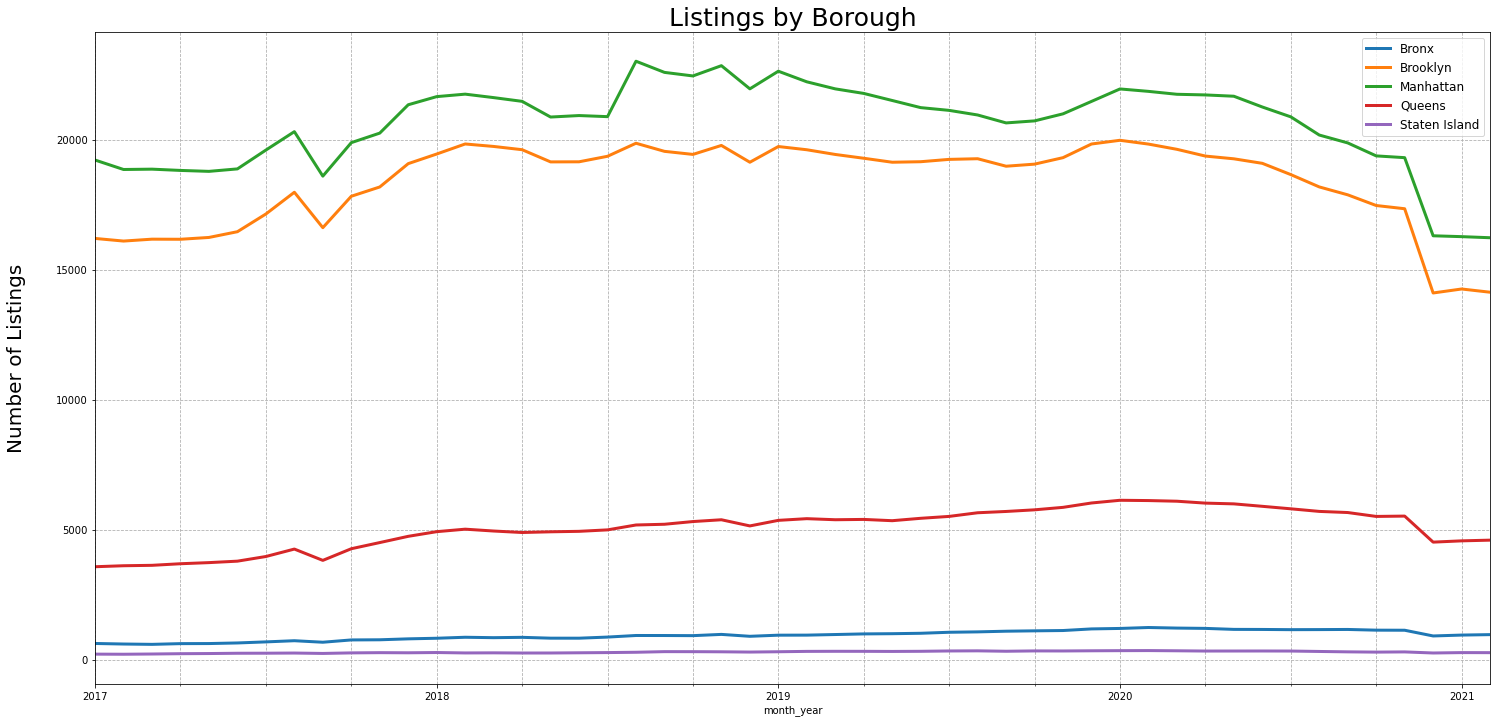

In [18]:
# Plot a chart that shows the total number of listings by borough over time

fig, ax = plt.subplots(figsize=(25,12))
plt.ylabel('Number of Listings', size = 15, labelpad = 30, fontsize = 20)
working_frame.groupby(['month_year', 'neighbourhood_group_cleansed']).count()['id'].unstack().plot(ax=ax, linewidth = 3);
plt.grid(which='both',linestyle='--')
plt.title("Listings by Borough", size = 25);
plt.gca().legend().set_title('')
plt.legend(fontsize=12)

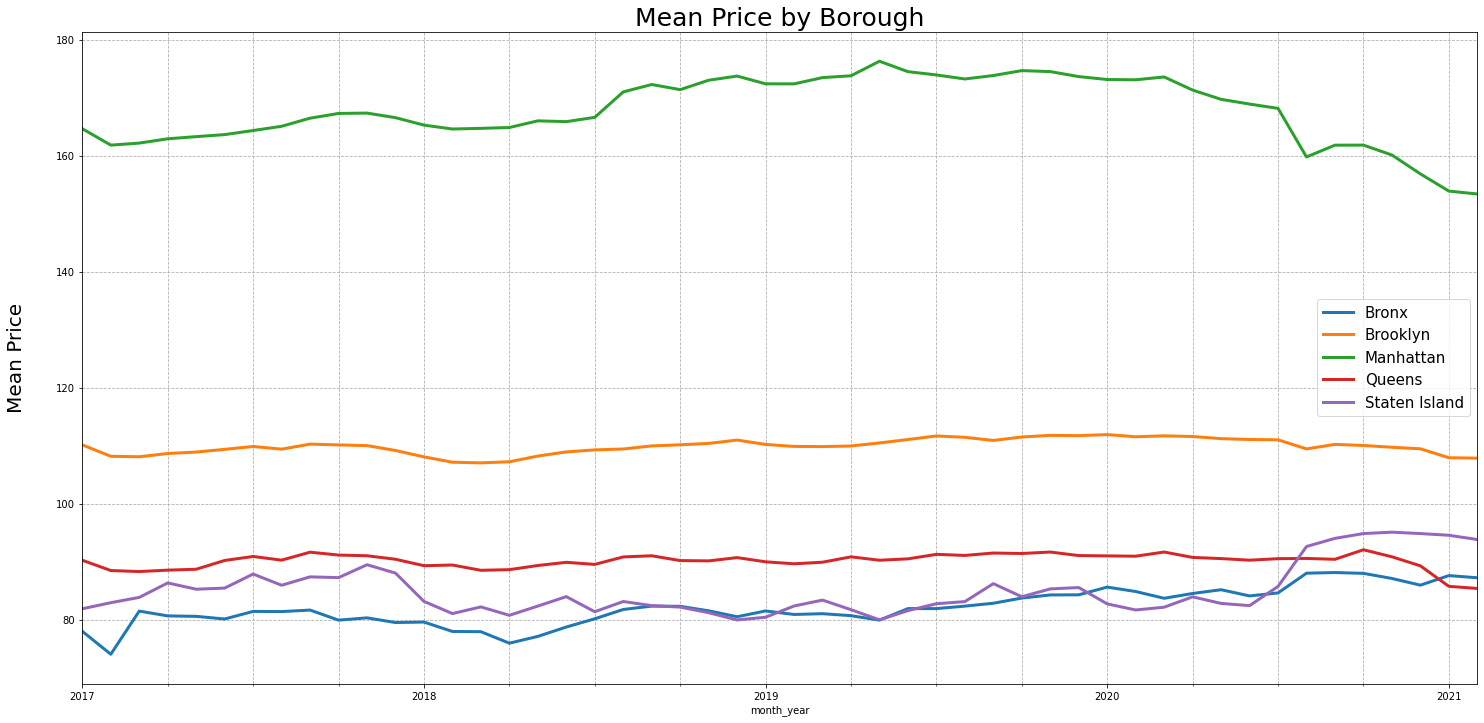

In [9]:
fig, ax = plt.subplots(figsize=(25,12))
plt.ylabel('Mean Price', size = 15, labelpad = 30, fontsize = 20)
working_frame.groupby(['month_year', 'neighbourhood_group_cleansed']).mean()['price'].unstack().plot(ax=ax, linewidth = 3);
plt.grid(which='both',linestyle='--')
plt.title("Mean Price by Borough", size = 25);
plt.gca().legend().set_title('');
plt.legend(fontsize=15);

In [16]:
# Test if drop in Manhattan prices is statistically significant

current_price = working_frame.loc[(working_frame['month_year'] == '2021-02') & (working_frame['neighbourhood_group_cleansed'] == 'Manhattan'), 'price']
jan_2020 = working_frame.loc[(working_frame['month_year'] == '2020-01') & (working_frame['neighbourhood_group_cleansed'] == 'Manhattan'), 'price']
stats.ttest_ind(current_price,jan_2020)

Ttest_indResult(statistic=-15.13828585121873, pvalue=1.2791313925602452e-51)

In [17]:
# Test if price as of Feb 2021 is statistically significantly lower in Brooklyn than Manhattan

brooklyn_2021_02 = working_frame.loc[(working_frame['month_year'] == '2021-02') & (working_frame['neighbourhood_group_cleansed'] == 'Brooklyn'), 'price']
manhattan_2021_02 = working_frame.loc[(working_frame['month_year'] == '2021-02') & (working_frame['neighbourhood_group_cleansed'] == 'Manhattan'), 'price']
stats.ttest_ind(brooklyn_2021_02, manhattan_2021_02)

Ttest_indResult(statistic=-36.29071539678108, pvalue=2.4759068068561097e-282)